In [442]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
absor1 = pd.read_csv('/Users/huihaoz/Downloads/GeometricA_Earth_HighCloud_UltraRes1.dat', comment = '#', delimiter='\s+')
absor2 = pd.read_csv('/Users/huihaoz/Downloads/mktrans_zmnq_16_15.dat', comment = '#', delimiter='\s+')
pts=pd.read_csv('/Users/huihaoz/Downloads/PT_PES.txt', sep=',')
pts["Teq"] = (pts.STK * ((pts.SRadiusSun *  const.R_sun/(2*pts.SMAAU * const.au)))**(1/2) * (1-0.3)**(0.25))
pts.iloc[0,8]=181.7
pts.iloc[3,8]=351
pts.iloc[9,8]=468
pts.iloc[11,8]=301
# Split a Python List into Chunks using For Loops
our_list = np.array(absor1.albH2O[:1079300])
chunked_list = list()
chunk_size = 251*2*5
for i in range(0, len(our_list), chunk_size):
    chunked_list.append(our_list[i:i+chunk_size])
    
our_listwl = np.array(absor1.nm[:1079300] / 1000)
chunked_listwl = list()
chunk_sizewl = 251*2*5
for i in range(0, len(our_listwl), chunk_sizewl):
    chunked_listwl.append(our_listwl[i:i+chunk_sizewl])
    
y_fit_index = np.linspace(0,429,430,dtype = int)
wl_fit_index = [np.argmax(chunked_list[i]) for i in y_fit_index] #just for check

pn_fit_non = [max(chunked_list[i]) for i in y_fit_index]
wl_fit_non = [chunked_listwl[i][np.argmax(chunked_list[i])] for i in y_fit_index]
alb_nogas = np.interp(absor1.nm/1000,wl_fit_non,np.array(pn_fit_non))
wl_um2 = np.array(absor1.nm[:1079300])/1000 * u.um
my_list_norabd = (absor1.totalb / alb_nogas)

# Iterate over the list and replace any value greater than 1 with 1
for i in range(len(my_list_norabd)):
    if my_list_norabd[i] > 1:
        my_list_norabd[i] = 1
tbd_planet=[]

for i in range(len(pts.Teq)):
    tbd_planet.append(np.array(my_list_norabd[:1079300]) * 2 * const.h *const.c**2 / ((wl_um2)**5 * (np.e**(const.c * const.h / (wl_um2 *const.k_B * pts.Teq[i] * u.K)) - 1)))
dis_2 = pts.DistancePC* const.pc
d_s_2 = pts.RadiusEar * const.R_earth
ste = (d_s_2**2 * np.pi / dis_2**2)
tbd_planet_earth = []
for i in range(len(tbd_planet)):

    tbd_planet_earth.append((tbd_planet[i] * ste[i]).to(u.erg/(u.s * u.cm**2 * u.um)))
Flux_tbd_planet_earth =[]
for i in range(len(tbd_planet_earth)):
    Flux_tbd_planet_earth.append((tbd_planet_earth[i][1:] * np.diff(wl_um2)).to(u.W/u.m**2))


f_tra0 = pd.read_csv('/Users/huihaoz/Downloads/lte030.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra1 = pd.read_csv('/Users/huihaoz/Downloads/lte030.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra2 = pd.read_csv('/Users/huihaoz/Downloads/lte036.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra3 = pd.read_csv('/Users/huihaoz/Downloads/lte035.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra4 = pd.read_csv('/Users/huihaoz/Downloads/lte034.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra5 = pd.read_csv('/Users/huihaoz/Downloads/lte037.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra6 = pd.read_csv('/Users/huihaoz/Downloads/lte035.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra7 = pd.read_csv('/Users/huihaoz/Downloads/lte034.0-4.5-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra8 = pd.read_csv('/Users/huihaoz/Downloads/lte030.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra9 = pd.read_csv('/Users/huihaoz/Downloads/lte037.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra10 = pd.read_csv('/Users/huihaoz/Downloads/lte029.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra11 = pd.read_csv('/Users/huihaoz/Downloads/lte032.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra12 = pd.read_csv('/Users/huihaoz/Downloads/lte029.0-5.5-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra13 = pd.read_csv('/Users/huihaoz/Downloads/lte033.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra14 = pd.read_csv('/Users/huihaoz/Downloads/lte026.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra15 = pd.read_csv('/Users/huihaoz/Downloads/lte026.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_traErgsseccmA=np.array([np.array(f_tra0.ErgsseccmA),np.array(f_tra1.ErgsseccmA),np.array(f_tra2.ErgsseccmA),np.array(f_tra3.ErgsseccmA),np.array(f_tra4.ErgsseccmA),np.array(f_tra5.ErgsseccmA),np.array(f_tra6.ErgsseccmA),np.array(f_tra7.ErgsseccmA),np.array(f_tra8.ErgsseccmA),np.array(f_tra9.ErgsseccmA),np.array(f_tra10.ErgsseccmA),np.array(f_tra11.ErgsseccmA),np.array(f_tra12.ErgsseccmA),np.array(f_tra13.ErgsseccmA),np.array(f_tra14.ErgsseccmA),np.array(f_tra15.ErgsseccmA)])
f_tra1_fum0=[10**(i-8) * u.erg/(u.s * u.cm**2 *u.Angstrom) for i in f_traErgsseccmA]
f_traAng=np.array([np.array(f_tra0.Angstroem / 10000),np.array(f_tra1.Angstroem / 10000),np.array(f_tra2.Angstroem / 10000),np.array(f_tra3.Angstroem / 10000),np.array(f_tra4.Angstroem / 10000),np.array(f_tra5.Angstroem / 10000),np.array(f_tra6.Angstroem / 10000),np.array(f_tra7.Angstroem / 10000),np.array(f_tra8.Angstroem / 10000),np.array(f_tra9.Angstroem / 10000),np.array(f_tra10.Angstroem / 10000),np.array(f_tra11.Angstroem / 10000),np.array(f_tra12.Angstroem / 10000),np.array(f_tra13.Angstroem / 10000),np.array(f_tra14.Angstroem / 10000),np.array(f_tra15.Angstroem / 10000)])


/var/folders/6t/cpjtlkn10wv603vnph9nr3sh0000gn/T/ipykernel_22589/2583433914.py:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  f_traErgsseccmA=np.array([np.array(f_tra0.ErgsseccmA),np.array(f_tra1.ErgsseccmA),np.array(f_tra2.ErgsseccmA),np.array(f_tra3.ErgsseccmA),np.array(f_tra4.ErgsseccmA),np.array(f_tra5.ErgsseccmA),np.array(f_tra6.ErgsseccmA),np.array(f_tra7.ErgsseccmA),np.array(f_tra8.ErgsseccmA),np.array(f_tra9.ErgsseccmA),np.array(f_tra10.ErgsseccmA),np.array(f_tra11.ErgsseccmA),np.array(f_tra12.ErgsseccmA),np.array(f_tra13.ErgsseccmA),np.array(f_tra14.ErgsseccmA),np.array(f_tra15.ErgsseccmA)])
/var/folders/6t/cpjtlkn10wv603vnph9nr3sh0000gn/T/ipykernel_22589/2583433914.py:74: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which i

In [443]:
absor1

,nm,totalb,albH2O,albco2,albn2o,albch4,albo2,albo3
0,500.000000,0.529546,0.551133,0.551133,0.551133,0.551133,0.551133,0.529546
1,500.001151,0.529549,0.551138,0.551138,0.551138,0.551138,0.551138,0.529549
2,500.002303,0.529552,0.551143,0.551143,0.551143,0.551143,0.551143,0.529552
3,500.003454,0.529555,0.551149,0.551149,0.551149,0.551149,0.551149,0.529555
4,500.004605,0.529559,0.551154,0.551154,0.551154,0.551154,0.551154,0.529559
...,...,...,...,...,...,...,...,...
1699995,24999.770081,237.124200,237.124200,120.289100,120.289100,120.289100,120.289100,120.289100
1699996,24999.827561,236.584200,236.584200,120.290300,120.290300,120.290300,120.290300,120.290300
1699997,24999.885040,236.046700,236.046600,120.291500,120.291500,120.291500,120.291500,120.291500
1699998,24999.942520,235.417900,235.417900,120.292700,120.292700,120.292700,120.292700,120.292700


(0.0, 1.5)

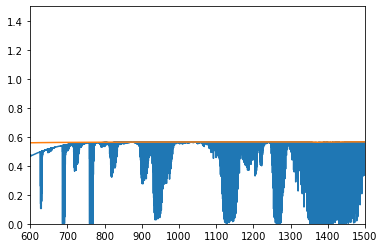

In [444]:
plt.plot(absor1.nm,absor1.totalb)
plt.plot(absor1.nm,alb_nogas)
plt.xlim(600,1500)
plt.ylim(0,1.5)

In [445]:
f_ref_earth_fit =[]
for i in range(len(f_tra1_fum0)):
    f_ref_earth_fit.append(np.interp(absor1.nm[:1079300]/1000,f_traAng[i],f_tra1_fum0[i]))

In [446]:
Flux_surface = []
for i in range(len(f_ref_earth_fit)):
    Flux_surface.append((f_ref_earth_fit[i][1:] * np.diff(absor1.nm[:1079300]/1000) * u.um).to(u.W/u.m**2))

In [447]:
df = (pts.SRadiusSun * const.R_sun / (pts.SMAAU * const.au))**2

f_ref_p = np.array(Flux_surface)* np.array(df).reshape(-1,1)
f_ref_earth = f_ref_p* np.pi * np.array(((pts.RadiusEar * const.R_earth)**2 / (4 * np.pi * (pts.DistancePC * const.pc)**2))).reshape(-1,1)
f_ref_earth_fit = f_ref_earth 

modern_earth_abd_fit = np.array(my_list_norabd[1:1079300])*0.3
f_ref_planet_earth_fit = [i * modern_earth_abd_fit for i in f_ref_earth_fit] #w/m2
flux_tot = np.array(f_ref_planet_earth_fit)+np.array(Flux_tbd_planet_earth)
wl_um_check = np.linspace(0.5,2.45,1950) * u.um

Range_min=wl_um_check-np.diff(wl_um_check)[1]*0.5
Range_max=wl_um_check+np.diff(wl_um_check)[1]*0.5
bin_range=[]
for i in range(len(wl_um_check)):
    bin_range.append(np.where((absor1.nm[1:1079300]/1000 < Range_max[i]/u.um) & (absor1.nm[1:1079300]/1000 > Range_min[i]/u.um)))
flux_bin = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]#W/m**2
for a in range(len(flux_tot)):
    for i in range(len(bin_range)):
        flux_bin[a].append(np.sum(flux_tot[a][bin_range[i]]))
        

# NO GAS
my_list_Noabd = alb_nogas*0+1
tbd_planet_no=[]

for i in range(len(pts.Teq)):
    tbd_planet_no.append(np.array(my_list_Noabd[:1079300]) * 2 * const.h *const.c**2 / ((wl_um2)**5 * (np.e**(const.c * const.h / (wl_um2 *const.k_B * pts.Teq[i] * u.K)) - 1)))
tbd_planet_earth_no = []
for i in range(len(tbd_planet_no)):
    tbd_planet_earth_no.append((tbd_planet_no[i] * ste[i]).to(u.erg/(u.s * u.cm**2 * u.um)))
Flux_tbd_planet_earth_no =[]
for i in range(len(tbd_planet_earth_no)):
    Flux_tbd_planet_earth_no.append((tbd_planet_earth_no[i][1:] * np.diff(wl_um2)).to(u.W/u.m**2))
##
modern_earth_abd_fit_no = np.array(my_list_norabd[1:1079300])*0 + 0.3
f_ref_planet_earth_fit_no = [i * modern_earth_abd_fit_no for i in f_ref_earth_fit]
flux_tot_no = np.array(f_ref_planet_earth_fit_no)+np.array(Flux_tbd_planet_earth_no)

flux_bin_no = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]#W/m**2
for a in range(len(flux_tot_no)):
    for i in range(len(bin_range)):
        flux_bin_no[a].append(np.sum(flux_tot_no[a][bin_range[i]]))

---

# Star

In [448]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
from astropy.nddata import NDData

In [449]:
h = const.h
wl_um = np.linspace(0.5,2.45,1950) * u.um
c = const.c #unit:m/s
wl_m = (wl_um).to(u.m)
pe_1 = h * c / (wl_um).to(u.um)
wl_um_check = np.linspace(0.5,2.45,1950)*u.um

In [450]:
df_s = (pts.SRadiusSun * const.R_sun / (pts.DistancePC * const.pc))**2
f_s = np.array(Flux_surface)*np.array(df_s).reshape(-1,1)
f_s_fit = f_s 
flux_bin_s = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]#W/m**2
for a in range(len(f_s_fit)):
    for i in range(len(bin_range)):
        flux_bin_s[a].append(np.sum(f_s_fit[a][bin_range[i]]))

In [1174]:
pts=pd.read_csv('/Users/huihaoz/Downloads/PT_PES.txt', sep=',')
R = 3500 # here we set Reseolution = 1000
t = 57960*u.s # here we set time = 1h with unit:s
S = (3930 * 0.5)**2 * np.pi *u.cm * u.cm #here we set diameter as the first diameter with unit:cm

In [1175]:
pe_1

<Quantity [3.97289171e-25, 3.96495773e-25, 3.95705537e-25, ...,
           8.11456981e-26, 8.11125469e-26, 8.10794227e-26] J m / um>

In [1176]:
wl_um_check

<Quantity [0.5       , 0.50100051, 0.50200103, ..., 2.44799897, 2.44899949,
           2.45      ] um>

In [1177]:
pn_0_elt=(np.array(flux_bin_s[0])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_1_elt=(np.array(flux_bin_s[1])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_2_elt=(np.array(flux_bin_s[2])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_3_elt=(np.array(flux_bin_s[3])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_4_elt=(np.array(flux_bin_s[4])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_5_elt=(np.array(flux_bin_s[5])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_6_elt=(np.array(flux_bin_s[6])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_7_elt=(np.array(flux_bin_s[7])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_8_elt=(np.array(flux_bin_s[8])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_9_elt=(np.array(flux_bin_s[9])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_10_elt=(np.array(flux_bin_s[10])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_11_elt=(np.array(flux_bin_s[11])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_12_elt=(np.array(flux_bin_s[12])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_13_elt=(np.array(flux_bin_s[13])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_14_elt=(np.array(flux_bin_s[14])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_15_elt=(np.array(flux_bin_s[15])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)

In [1178]:
phe_1e=[i * u.W/u.m**2 for i in flux_bin] #new method, f_palnet

In [1179]:
pn_0e_elt=(np.array(phe_1e[0])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_1e_elt=(np.array(phe_1e[1])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_2e_elt=(np.array(phe_1e[2])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_3e_elt=(np.array(phe_1e[3])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_4e_elt=(np.array(phe_1e[4])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_5e_elt=(np.array(phe_1e[5])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_6e_elt=(np.array(phe_1e[6])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_7e_elt=(np.array(phe_1e[7])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_8e_elt=(np.array(phe_1e[8])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_9e_elt=(np.array(phe_1e[9])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_10e_elt=(np.array(phe_1e[10])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_11e_elt=(np.array(phe_1e[11])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_12e_elt=(np.array(phe_1e[12])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_13e_elt=(np.array(phe_1e[13])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_14e_elt=(np.array(phe_1e[14])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_15e_elt=(np.array(phe_1e[15])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)

# Noise

In [1180]:
pe_1 = h * c / (wl_um).to(u.um) #energy of photon
ste_atmo2 = ((2*u.um / (39.3*u.m))**2 * u.steradian).to(u.arcsec**2) #ste
n_s = pd.read_csv('/Users/huihaoz/Documents/reseatch/radiance.dat.txt', comment = '#', delimiter='\s+')
wl_ns = (np.array(n_s["wavelength(nm)"])*u.nm).to(u.um)
bri_surface = np.array(n_s["ph/sec/arcsec^2/um/m^2"])*u.ph/(u.m**2 * u.s * u.arcsec**2 *u.um)
pe_ns = (h * c /wl_ns).to(u.J)/u.ph
st = ste_atmo2
f_n_s = ((bri_surface *pe_ns).to(u.W/(u.m**2 * u.um * u.steradian))*st*np.diff(wl_ns)[1]).to(u.W/u.m**2)
bin_range_n = []

for i in range(len(wl_um)):
    bin_range_n.append(np.where((wl_ns/u.um < Range_max[i]/u.um) & (wl_ns/u.um > Range_min[i]/u.um)))
f_r_n=[]
for i in range(len(bin_range_n)):
    f_r_n.append(np.sum(f_n_s[bin_range_n[i]]).value)
pe_e = (h * c / wl_um).to(u.J)
noif_sky =(np.array(f_r_n)*u.W/u.m**2)
pnsky_1_elt=(noif_sky*S*t*wl_um/(pe_1*u.um)).to(u.m/u.m)

In [1181]:
trans = pd.read_csv('/Users/huihaoz/Documents/reseatch/transmission.dat.txt', comment = '#', delimiter='\s+')
trans_use = np.interp(wl_um/u.um,trans["wavelength(nm)"]/1000,trans["transmission"])
pn_pla_elt=[pn_0e_elt,pn_1e_elt,pn_2e_elt,pn_3e_elt,pn_4e_elt,pn_5e_elt,pn_6e_elt,pn_7e_elt,pn_8e_elt,pn_9e_elt,pn_10e_elt,pn_11e_elt,pn_12e_elt,pn_13e_elt,pn_14e_elt,pn_15e_elt]
pn_star_elt=[pn_0_elt,pn_1_elt,pn_2_elt,pn_3_elt,pn_4_elt,pn_5_elt,pn_6_elt,pn_7_elt,pn_8_elt,pn_9_elt,pn_10_elt,pn_11_elt,pn_12_elt,pn_13_elt,pn_14_elt,pn_15_elt]
nor_trans = np.random.normal(trans_use,0.001*trans_use)

In [1182]:
c_1 = 10**(-4)
n_0 = ((((pn_0e_elt+2*c_1*pn_0_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.01)**2 * pn_0e_elt**2)**(1/2)
n_1 = ((((pn_1e_elt+2*c_1*pn_1_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.01)**2 * pn_1e_elt**2)**(1/2)
n_2 = ((((pn_2e_elt+2*c_1*pn_2_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.01)**2 * pn_2e_elt**2)**(1/2)
n_3 = ((((pn_3e_elt+2*c_1*pn_3_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.01)**2 * pn_3e_elt**2)**(1/2)
n_4 = ((((pn_4e_elt+2*c_1*pn_4_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.01)**2 * pn_4e_elt**2)**(1/2)
n_5 = ((((pn_5e_elt+2*c_1*pn_5_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.01)**2 * pn_5e_elt**2)**(1/2)
n_6 = ((((pn_6e_elt+2*c_1*pn_6_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.01)**2 * pn_6e_elt**2)**(1/2)
n_7 = ((((pn_7e_elt+2*c_1*pn_7_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.01)**2 * pn_7e_elt**2)**(1/2)
n_8 = ((((pn_8e_elt+2*c_1*pn_8_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.01)**2 * pn_8e_elt**2)**(1/2)
n_9 = ((((pn_9e_elt+2*c_1*pn_9_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.01)**2 * pn_9e_elt**2)**(1/2)
n_10 = ((((pn_10e_elt+2*c_1*pn_10_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.01)**2 * pn_10e_elt**2)**(1/2)
n_11 = ((((pn_11e_elt+2*c_1*pn_11_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.01)**2 * pn_11e_elt**2)**(1/2)
n_12 = ((((pn_12e_elt+2*c_1*pn_12_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.01)**2 * pn_12e_elt**2)**(1/2)
n_13 = ((((pn_13e_elt+2*c_1*pn_13_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.01)**2 * pn_13e_elt**2)**(1/2)
n_14 = ((((pn_14e_elt+2*c_1*pn_14_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.01)**2 * pn_14e_elt**2)**(1/2)
n_15 = ((((pn_15e_elt+2*c_1*pn_15_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.01)**2 * pn_15e_elt**2)**(1/2)

# No gas

In [1183]:
phe_1e_nogas=[i * u.W/u.m**2 for i in flux_bin_no] #changed

In [1184]:
pn_0e_elt_nogas=(np.array(phe_1e_nogas[0])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_1e_elt_nogas=(np.array(phe_1e_nogas[1])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_2e_elt_nogas=(np.array(phe_1e_nogas[2])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_3e_elt_nogas=(np.array(phe_1e_nogas[3])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_4e_elt_nogas=(np.array(phe_1e_nogas[4])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_5e_elt_nogas=(np.array(phe_1e_nogas[5])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_6e_elt_nogas=(np.array(phe_1e_nogas[6])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_7e_elt_nogas=(np.array(phe_1e_nogas[7])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_8e_elt_nogas=(np.array(phe_1e_nogas[8])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_9e_elt_nogas=(np.array(phe_1e_nogas[9])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_10e_elt_nogas=(np.array(phe_1e_nogas[10])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_11e_elt_nogas=(np.array(phe_1e_nogas[11])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_12e_elt_nogas=(np.array(phe_1e_nogas[12])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_13e_elt_nogas=(np.array(phe_1e_nogas[13])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_14e_elt_nogas=(np.array(phe_1e_nogas[14])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)
pn_15e_elt_nogas=(np.array(phe_1e_nogas[15])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)

In [1185]:
dn = np.array([pn_0e_elt_nogas-pn_0e_elt,pn_1e_elt_nogas-pn_1e_elt,pn_2e_elt_nogas-pn_2e_elt,pn_3e_elt_nogas-pn_3e_elt,pn_4e_elt_nogas-pn_4e_elt,pn_5e_elt_nogas-pn_5e_elt,pn_6e_elt_nogas-pn_6e_elt,pn_7e_elt_nogas-pn_7e_elt,pn_8e_elt_nogas-pn_8e_elt,pn_9e_elt_nogas-pn_9e_elt,pn_10e_elt_nogas-pn_10e_elt,pn_11e_elt_nogas-pn_11e_elt,pn_12e_elt_nogas-pn_12e_elt,pn_13e_elt_nogas-pn_13e_elt,pn_14e_elt_nogas-pn_14e_elt,pn_15e_elt_nogas-pn_15e_elt])
dnr = np.array([n_0,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9,n_10,n_11,n_12,n_13,n_14,n_15])

# OK, all data debuged(above)
---

In [1186]:
h2o_f=(0.3-0.3*(absor1.albH2O[:1079300]/alb_nogas[:1079300]))
co2_f=(0.3-0.3*(absor1.albco2[:1079300]/alb_nogas[:1079300]))
ch4_f=(0.3-0.3*(absor1.albch4[:1079300]/alb_nogas[:1079300]))
o2_f=(0.3-0.3*(absor1.albo2[:1079300]/alb_nogas[:1079300]))

O2

In [1187]:
# Split a Python List into Chunks using For Loops
our_list = np.array(o2_f)
chunked_list = list()
chunk_size = 251*5*2
for i in range(0, len(our_list), chunk_size):
    chunked_list.append(our_list[i:i+chunk_size])
    
our_listwl = np.array(absor1.nm[:1079300] / 1000)
chunked_listwl = list()
chunk_sizewl = 251*5*2
for i in range(0, len(our_listwl), chunk_sizewl):
    chunked_listwl.append(our_listwl[i:i+chunk_sizewl])
    
y_fit_index = np.linspace(0,429,430,dtype = int)
wl_fit_index = [np.argmax(chunked_list[i]) for i in y_fit_index] #just for check

pn_fit_non = [max(chunked_list[i]) for i in y_fit_index]
wl_fit_non = [chunked_listwl[i][np.argmax(chunked_list[i])] for i in y_fit_index]
interp_o2 = np.interp(wl_um/u.um,wl_fit_non,np.array(pn_fit_non))
baseline_feat = absor1.albo2[300000]*0.5*0.5
ind_o2 = np.where((interp_o2>0.15))

In [1188]:
# Split a Python List into Chunks using For Loops
our_list = np.array(h2o_f)
chunked_list = list()
chunk_size = 251*5*2
for i in range(0, len(our_list), chunk_size):
    chunked_list.append(our_list[i:i+chunk_size])
    
our_listwl = np.array(absor1.nm[:1079300] / 1000)
chunked_listwl = list()
chunk_sizewl = 251*5*2
for i in range(0, len(our_listwl), chunk_sizewl):
    chunked_listwl.append(our_listwl[i:i+chunk_sizewl])
    
y_fit_index = np.linspace(0,429,430,dtype = int)
wl_fit_index = [np.argmax(chunked_list[i]) for i in y_fit_index] #just for check

pn_fit_non = [max(chunked_list[i]) for i in y_fit_index]
wl_fit_non = [chunked_listwl[i][np.argmax(chunked_list[i])] for i in y_fit_index]
interp_h2o = np.interp(wl_um/u.um,wl_fit_non,np.array(pn_fit_non))
ind_h2o = np.where((interp_h2o>0.15))

In [1189]:
len(interp_h2o)

1950

In [1190]:
wl_um

<Quantity [0.5       , 0.50100051, 0.50200103, ..., 2.44799897, 2.44899949,
           2.45      ] um>

In [1191]:
wl_um[ind_h2o]

<Quantity [0.90020523, 0.90120575, 0.90220626, 0.90320677, 0.93022063,
           0.93122114, 0.93222165, 0.93322217, 0.93422268, 0.93522319,
           0.9362237 , 0.93722422, 0.93822473, 0.93922524, 0.94022576,
           0.94122627, 0.94222678, 0.9432273 , 0.94422781, 0.94522832,
           0.94622884, 0.94722935, 0.94822986, 0.94923037, 0.95023089,
           0.9512314 , 0.95223191, 0.95323243, 0.95423294, 0.95523345,
           0.95623397, 0.95723448, 0.95823499, 0.95923551, 0.96023602,
           0.96123653, 0.96223704, 0.96323756, 0.96423807, 0.96523858,
           0.9662391 , 0.96723961, 1.11431503, 1.11531555, 1.11631606,
           1.11731657, 1.11831709, 1.1193176 , 1.12031811, 1.12131862,
           1.12231914, 1.12331965, 1.12432016, 1.12532068, 1.12632119,
           1.1273217 , 1.12832222, 1.12932273, 1.13032324, 1.13132376,
           1.13232427, 1.13332478, 1.1343253 , 1.13532581, 1.13632632,
           1.13732683, 1.13832735, 1.13932786, 1.14032837, 1.14132889,
      

In [1192]:
# Split a Python List into Chunks using For Loops
our_list = np.array(ch4_f)
chunked_list = list()
chunk_size = 251*5*2
for i in range(0, len(our_list), chunk_size):
    chunked_list.append(our_list[i:i+chunk_size])
    
our_listwl = np.array(absor1.nm[:1079300] / 1000)
chunked_listwl = list()
chunk_sizewl = 251*5*2
for i in range(0, len(our_listwl), chunk_sizewl):
    chunked_listwl.append(our_listwl[i:i+chunk_sizewl])
    
y_fit_index = np.linspace(0,429,430,dtype = int)
wl_fit_index = [np.argmax(chunked_list[i]) for i in y_fit_index] #just for check

pn_fit_non = [max(chunked_list[i]) for i in y_fit_index]
wl_fit_non = [chunked_listwl[i][np.argmax(chunked_list[i])] for i in y_fit_index]
interp_ch4 = np.interp(wl_um/u.um,wl_fit_non,np.array(pn_fit_non))
ind_ch4 = np.where((interp_ch4>0.15))

In [1193]:
# Split a Python List into Chunks using For Loops
our_list = np.array(co2_f)
chunked_list = list()
chunk_size = 251*5*2
for i in range(0, len(our_list), chunk_size):
    chunked_list.append(our_list[i:i+chunk_size])
    
our_listwl = np.array(absor1.nm[:1079300] / 1000)
chunked_listwl = list()
chunk_sizewl = 251*5*2
for i in range(0, len(our_listwl), chunk_sizewl):
    chunked_listwl.append(our_listwl[i:i+chunk_sizewl])
    
y_fit_index = np.linspace(0,429,430,dtype = int)
wl_fit_index = [np.argmax(chunked_list[i]) for i in y_fit_index] #just for check

pn_fit_non = [max(chunked_list[i]) for i in y_fit_index]
wl_fit_non = [chunked_listwl[i][np.argmax(chunked_list[i])] for i in y_fit_index]
interp_co2 = np.interp(wl_um/u.um,wl_fit_non,np.array(pn_fit_non))
ind_co2 = np.where((interp_co2>0.15))

In [1194]:
lisco2 = ind_co2[0].tolist()
lish2o = ind_h2o[0].tolist()
liso2 = ind_o2[0].tolist()
lisch4 = ind_ch4[0].tolist()
set1 = set(lisco2)
set2 = set(lish2o)
set3 = set(liso2)
set4 = set(lisch4)
common = set1 & set2 | set1 & set3 | set1 & set4 | set2 & set3 | set2 & set4 | set3 & set4

In [1195]:
set1 -= common
set2 -= common
set3 -= common
set4 -= common

indco2 = list(set1)
indh2o = list(set2)
indo2 = list(set3)
indch4 = list(set4)

In [1196]:
indco2.sort()
indh2o.sort()
indo2.sort()
indch4.sort()

In [1197]:
indco2

[1069,
 1070,
 1071,
 1072,
 1073,
 1074,
 1075,
 1076,
 1077,
 1078,
 1079,
 1080,
 1081,
 1082,
 1083,
 1084,
 1085,
 1086,
 1087,
 1100,
 1101,
 1102,
 1103,
 1104,
 1105,
 1106,
 1107,
 1108,
 1109,
 1110,
 1111,
 1112,
 1490,
 1491,
 1492,
 1493,
 1494,
 1495,
 1496,
 1497,
 1498,
 1499,
 1500,
 1501,
 1502,
 1503,
 1504,
 1505,
 1506,
 1507,
 1508,
 1509,
 1510,
 1511,
 1512,
 1513,
 1514,
 1515,
 1516,
 1517,
 1518,
 1519,
 1520,
 1521,
 1522,
 1523,
 1524,
 1525,
 1526,
 1527,
 1528,
 1529,
 1530,
 1531,
 1532,
 1533,
 1534,
 1535,
 1536,
 1537,
 1538,
 1539,
 1540,
 1541,
 1542,
 1543,
 1544,
 1545,
 1546,
 1547,
 1548,
 1549,
 1550,
 1551,
 1552,
 1553,
 1554,
 1555,
 1556,
 1557,
 1558,
 1559,
 1560,
 1561,
 1562,
 1563,
 1564,
 1565,
 1566,
 1567,
 1568,
 1569,
 1570,
 1571,
 1572,
 1573,
 1574,
 1575,
 1576,
 1577,
 1578,
 1579,
 1580,
 1581,
 1582,
 1583,
 1584,
 1585,
 1586,
 1587,
 1588,
 1589]

In [1198]:
indo2

[128,
 129,
 130,
 131,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 267,
 268,
 269,
 752,
 753,
 754,
 755,
 756,
 757,
 758,
 759,
 760,
 761,
 762,
 763,
 764,
 765,
 766,
 767,
 768,
 769,
 770,
 771,
 772,
 773,
 774,
 775,
 776,
 777,
 778,
 779,
 780,
 781,
 782,
 783]

In [1199]:
indco2

[1069,
 1070,
 1071,
 1072,
 1073,
 1074,
 1075,
 1076,
 1077,
 1078,
 1079,
 1080,
 1081,
 1082,
 1083,
 1084,
 1085,
 1086,
 1087,
 1100,
 1101,
 1102,
 1103,
 1104,
 1105,
 1106,
 1107,
 1108,
 1109,
 1110,
 1111,
 1112,
 1490,
 1491,
 1492,
 1493,
 1494,
 1495,
 1496,
 1497,
 1498,
 1499,
 1500,
 1501,
 1502,
 1503,
 1504,
 1505,
 1506,
 1507,
 1508,
 1509,
 1510,
 1511,
 1512,
 1513,
 1514,
 1515,
 1516,
 1517,
 1518,
 1519,
 1520,
 1521,
 1522,
 1523,
 1524,
 1525,
 1526,
 1527,
 1528,
 1529,
 1530,
 1531,
 1532,
 1533,
 1534,
 1535,
 1536,
 1537,
 1538,
 1539,
 1540,
 1541,
 1542,
 1543,
 1544,
 1545,
 1546,
 1547,
 1548,
 1549,
 1550,
 1551,
 1552,
 1553,
 1554,
 1555,
 1556,
 1557,
 1558,
 1559,
 1560,
 1561,
 1562,
 1563,
 1564,
 1565,
 1566,
 1567,
 1568,
 1569,
 1570,
 1571,
 1572,
 1573,
 1574,
 1575,
 1576,
 1577,
 1578,
 1579,
 1580,
 1581,
 1582,
 1583,
 1584,
 1585,
 1586,
 1587,
 1588,
 1589]

In [1200]:
wl_um[np.array(indch4)[np.where(np.diff(wl_um[indch4]).value>0.001259)[0]]]

<Quantity [1.68060544] um>

In [1201]:
indco2

[1069,
 1070,
 1071,
 1072,
 1073,
 1074,
 1075,
 1076,
 1077,
 1078,
 1079,
 1080,
 1081,
 1082,
 1083,
 1084,
 1085,
 1086,
 1087,
 1100,
 1101,
 1102,
 1103,
 1104,
 1105,
 1106,
 1107,
 1108,
 1109,
 1110,
 1111,
 1112,
 1490,
 1491,
 1492,
 1493,
 1494,
 1495,
 1496,
 1497,
 1498,
 1499,
 1500,
 1501,
 1502,
 1503,
 1504,
 1505,
 1506,
 1507,
 1508,
 1509,
 1510,
 1511,
 1512,
 1513,
 1514,
 1515,
 1516,
 1517,
 1518,
 1519,
 1520,
 1521,
 1522,
 1523,
 1524,
 1525,
 1526,
 1527,
 1528,
 1529,
 1530,
 1531,
 1532,
 1533,
 1534,
 1535,
 1536,
 1537,
 1538,
 1539,
 1540,
 1541,
 1542,
 1543,
 1544,
 1545,
 1546,
 1547,
 1548,
 1549,
 1550,
 1551,
 1552,
 1553,
 1554,
 1555,
 1556,
 1557,
 1558,
 1559,
 1560,
 1561,
 1562,
 1563,
 1564,
 1565,
 1566,
 1567,
 1568,
 1569,
 1570,
 1571,
 1572,
 1573,
 1574,
 1575,
 1576,
 1577,
 1578,
 1579,
 1580,
 1581,
 1582,
 1583,
 1584,
 1585,
 1586,
 1587,
 1588,
 1589]

In [1202]:
indtotno = indco2+ indh2o + indo2 + indch4

In [1203]:

snr_o2_total=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for a in range(16):
    snr_o2_total[a].append(np.sum((dn[a][indo2]/dnr[a][indo2])**2)**(1/2))

In [1204]:
snr_o2_total

[[0.6153105266861661],
 [1.9251161556904133],
 [8.992638484496645],
 [5.377232957113045],
 [2.062170746781315],
 [9.629131193468872],
 [2.884016878775699],
 [1.3988139308908536],
 [3.5965211749292125],
 [21.073747537332384],
 [4.097928121278342],
 [3.5205222622391217],
 [1.3022096734630264],
 [3.545087046707599],
 [0.5623563217519068],
 [0.08462259095250482]]

H2O

In [1205]:
snr_h2o_total=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for a in range(16):
    snr_h2o_total[a].append(np.sum((dn[a][indh2o]/dnr[a][indh2o])**2)**(1/2))

In [1206]:
snr_h2o_total

[[1.3658936319886594],
 [4.276357230878986],
 [16.01078322195538],
 [9.87015845512777],
 [3.904280838097297],
 [16.61371982571075],
 [5.292657221688262],
 [2.6950812379379183],
 [7.991405491655405],
 [36.54746072662782],
 [9.518167514307232],
 [7.148233024488038],
 [3.133496318698835],
 [6.933326075784346],
 [1.4515550631871843],
 [0.21842116512391033]]

In [1207]:
pts

,Planet,MassEar,RadiusEar,SMAAU,DistancePC,SRadiusSun,Slogg,STK
0,GJ 1002 c,1.360,1.089911,0.073800,4.848670,0.1400,5.100,3024.0
1,GJ 1061 d,1.640,1.148567,0.054000,3.672780,0.1600,5.160,2953.0
2,GJ 15 A b,3.030,1.592166,0.072000,3.562280,0.3800,4.870,3607.0
3,GJ 251 b,4.000,1.875654,0.081800,5.580570,0.3600,4.960,3451.0
4,GJ 273 b,2.890,1.548342,0.091101,5.921535,0.2900,4.910,3382.0
5,GJ 411 b,2.690,1.484195,0.078790,2.550000,0.3700,4.890,3719.0
6,GJ 625 b,2.820,1.526104,0.078361,6.472490,0.3100,4.940,3499.0
7,GJ 667 C c,3.800,1.819741,0.125000,7.243960,0.3300,4.690,3350.0
8,GJ 682 b,4.400,1.984149,0.080000,5.006710,0.3000,4.930,3028.0
9,GJ 887 b,4.200,1.930431,0.068000,3.290000,0.4700,4.780,3688.0


CH4

In [1208]:
snr_ch4_total=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for a in range(16):
    snr_ch4_total[a].append(np.sum((dn[a][indch4]/dnr[a][indch4])**2)**(1/2))

In [1209]:
snr_ch4_total

[[0.9556289615619233],
 [2.991525170004608],
 [9.91031329225611],
 [6.2110887632073934],
 [2.495340924390988],
 [10.109723558161923],
 [3.322299130189707],
 [1.7301602731485162],
 [5.589734373387681],
 [23.83455375227605],
 [6.8460549541401035],
 [4.755319240713385],
 [2.2290397630007983],
 [4.515684128371087],
 [1.1804770836978082],
 [0.17763349255619754]]

CO2

In [1210]:
snr_co2_total=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for a in range(16):
    snr_co2_total[a].append(np.sum((dn[a][indco2]/dnr[a][indco2])**2)**(1/2))

In [1211]:
snr_co2_total

[[1.9198602641281393],
 [6.010669004277063],
 [21.589485980849737],
 [13.337070757023936],
 [5.295077541621202],
 [22.324549919962244],
 [7.1463194458102075],
 [3.682076886313123],
 [11.237043059884858],
 [50.05842554960608],
 [13.59654026419785],
 [9.831364040730127],
 [4.450947303511594],
 [9.458810950978174],
 [2.2376663223242876],
 [0.3366809849075566]]

In [1212]:
#pts[['Planet', 'Teq','SNR_o2','SNR_ch4','SNR_h2o','SNR_co2','SNR_total']]

In [1213]:
Total_modern = (np.array(snr_ch4_total)**2+np.array(snr_co2_total)**2+np.array(snr_h2o_total)**2+np.array(snr_o2_total)**2)**(1/2)

In [1214]:
Total_modern

array([[ 2.61598215],
       [ 8.18966838],
       [30.02553814],
       [18.51458188],
       [ 7.33215722],
       [31.13403112],
       [ 9.9215587 ],
       [ 5.07654292],
       [15.30731176],
       [69.6688714 ],
       [18.41528993],
       [13.51887911],
       [ 6.02445843],
       [13.05753271],
       [ 2.97051064],
       [ 0.44696368]])

# Total_no_OVERLEAP(SNR from datafile)

# Check

In [1215]:
def mag(f, f_0):
    m=-2.5 * (np.log(f/f_0)/np.log(10))
    return m

In [1216]:
mag_pt=[]
for i in range(len(flux_bin)):
    mag_pt.append(mag(flux_bin[i][3],2.16e-8/75))

In [1217]:
mag_pt

[35.163311145466885,
 33.478072923762085,
 28.575629923814336,
 29.925319175920944,
 31.51236315896594,
 27.939482306051865,
 30.926562785210017,
 32.04928595916195,
 32.452245044300525,
 27.08265310475643,
 32.13035426557722,
 31.28061954853104,
 35.04754386304366,
 30.760834005008384,
 38.70358167143527,
 40.760259111390184]

In [1218]:
mag(flux_bin_s[9][3], 2.16e-8/75)

9.628480576151214

In [1219]:
pts["SNR_o2"]=np.array(snr_o2_total)
pts["SNR_ch4"]=np.array(snr_ch4_total)
pts["SNR_h2o"]=np.array(snr_h2o_total)
pts["SNR_co2"]=np.array(snr_co2_total)
pts["SNR_total"]=np.array(Total_modern)
#pts["NO_OVER"]=np.array(snr_total)
pts["mag"]=mag_pt


pts[['Planet','SNR_total']]

,Planet,SNR_total
0,GJ 1002 c,2.615982
1,GJ 1061 d,8.189668
2,GJ 15 A b,30.025538
3,GJ 251 b,18.514582
4,GJ 273 b,7.332157
5,GJ 411 b,31.134031
6,GJ 625 b,9.921559
7,GJ 667 C c,5.076543
8,GJ 682 b,15.307312
9,GJ 887 b,69.668871


In [1220]:
SNR_table  = pts[['Planet','SNR_total','SNR_h2o','SNR_ch4','SNR_co2','SNR_o2']].sort_values(by='SNR_total',ascending=False).round(2)
#pts[['Planet','SNR_total']]
SNR_table.to_latex()

/var/folders/6t/cpjtlkn10wv603vnph9nr3sh0000gn/T/ipykernel_22589/1026330911.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  SNR_table.to_latex()


"\\begin{tabular}{llrrrrr}\n\\toprule\n{} &              Planet &  SNR\\_total &  SNR\\_h2o &  SNR\\_ch4 &  SNR\\_co2 &  SNR\\_o2 \\\\\n\\midrule\n9  &            GJ 887 b &      69.67 &    36.55 &    23.83 &    50.06 &   21.07 \\\\\n5  &            GJ 411 b &      31.13 &    16.61 &    10.11 &    22.32 &    9.63 \\\\\n2  &           GJ 15 A b &      30.03 &    16.01 &     9.91 &    21.59 &    8.99 \\\\\n3  &            GJ 251 b &      18.51 &     9.87 &     6.21 &    13.34 &    5.38 \\\\\n10 &       Proxima Cen b &      18.42 &     9.52 &     6.85 &    13.60 &    4.10 \\\\\n8  &            GJ 682 b &      15.31 &     7.99 &     5.59 &    11.24 &    3.60 \\\\\n11 &          Ross 128 b &      13.52 &     7.15 &     4.76 &     9.83 &    3.52 \\\\\n13 &         Wolf 1061 c &      13.06 &     6.93 &     4.52 &     9.46 &    3.55 \\\\\n6  &            GJ 625 b &       9.92 &     5.29 &     3.32 &     7.15 &    2.88 \\\\\n1  &           GJ 1061 d &       8.19 &     4.28 &     2.99 &     6.01

In [1221]:
SNR_table

,Planet,SNR_total,SNR_h2o,SNR_ch4,SNR_co2,SNR_o2
9,GJ 887 b,69.67,36.55,23.83,50.06,21.07
5,GJ 411 b,31.13,16.61,10.11,22.32,9.63
2,GJ 15 A b,30.03,16.01,9.91,21.59,8.99
3,GJ 251 b,18.51,9.87,6.21,13.34,5.38
10,Proxima Cen b,18.42,9.52,6.85,13.60,4.10
8,GJ 682 b,15.31,7.99,5.59,11.24,3.60
11,Ross 128 b,13.52,7.15,4.76,9.83,3.52
13,Wolf 1061 c,13.06,6.93,4.52,9.46,3.55
6,GJ 625 b,9.92,5.29,3.32,7.15,2.88
1,GJ 1061 d,8.19,4.28,2.99,6.01,1.93


# GJ 887 b

run 1 first

In [1222]:
pts

,Planet,MassEar,RadiusEar,SMAAU,DistancePC,SRadiusSun,Slogg,STK,SNR_o2,SNR_ch4,SNR_h2o,SNR_co2,SNR_total,mag
0,GJ 1002 c,1.360,1.089911,0.073800,4.848670,0.1400,5.100,3024.0,0.615311,0.955629,1.365894,1.919860,2.615982,35.163311
1,GJ 1061 d,1.640,1.148567,0.054000,3.672780,0.1600,5.160,2953.0,1.925116,2.991525,4.276357,6.010669,8.189668,33.478073
2,GJ 15 A b,3.030,1.592166,0.072000,3.562280,0.3800,4.870,3607.0,8.992638,9.910313,16.010783,21.589486,30.025538,28.575630
3,GJ 251 b,4.000,1.875654,0.081800,5.580570,0.3600,4.960,3451.0,5.377233,6.211089,9.870158,13.337071,18.514582,29.925319
4,GJ 273 b,2.890,1.548342,0.091101,5.921535,0.2900,4.910,3382.0,2.062171,2.495341,3.904281,5.295078,7.332157,31.512363
5,GJ 411 b,2.690,1.484195,0.078790,2.550000,0.3700,4.890,3719.0,9.629131,10.109724,16.613720,22.324550,31.134031,27.939482
6,GJ 625 b,2.820,1.526104,0.078361,6.472490,0.3100,4.940,3499.0,2.884017,3.322299,5.292657,7.146319,9.921559,30.926563
7,GJ 667 C c,3.800,1.819741,0.125000,7.243960,0.3300,4.690,3350.0,1.398814,1.730160,2.695081,3.682077,5.076543,32.049286
8,GJ 682 b,4.400,1.984149,0.080000,5.006710,0.3000,4.930,3028.0,3.596521,5.589734,7.991405,11.237043,15.307312,32.452245
9,GJ 887 b,4.200,1.930431,0.068000,3.290000,0.4700,4.780,3688.0,21.073748,23.834554,36.547461,50.058426,69.668871,27.082653


In [1223]:
pn_9e_elt=(np.array(phe_1e[9])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)

In [1224]:
#len(gp_f_pla[9][0])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


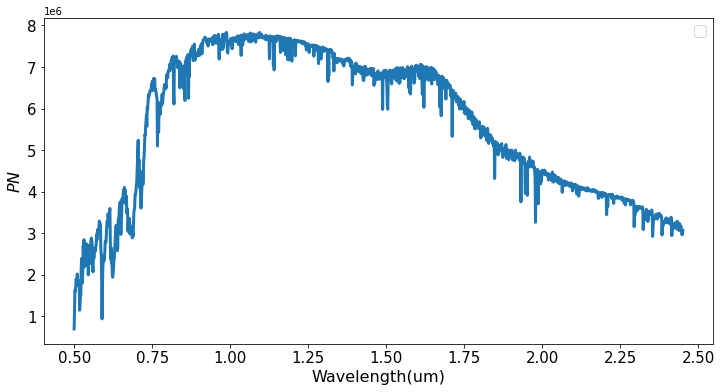

In [2416]:
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um,pn_9e_elt_nogas,linewidth=3,color = '#1f77b4' )
#plt.plot(wl_um_rem,pn_planet_elt_rem[9][0],linewidth=3,color = 'red' )
#plt.errorbar(wl_um[:765], pn_15e_elt_nogas[:765],
#             yerr = dnr[15][:765],
#             fmt ='o')
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$PN$",fontdict={ 'size'   : 16})
#plt.xlim(0.9,5.6)
#plt.ylim(0,0.5e3)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


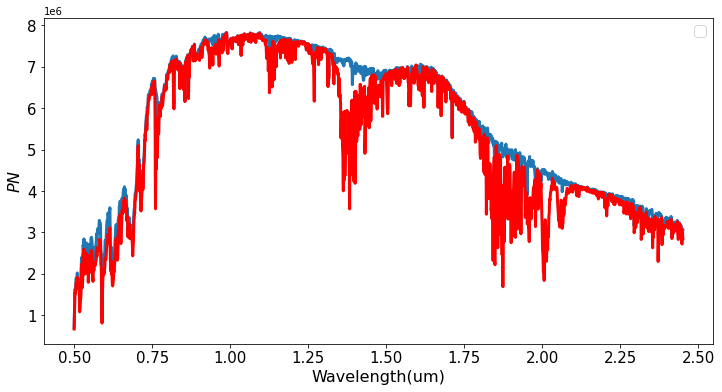

In [2417]:
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um,pn_9e_elt_nogas,linewidth=3,color = '#1f77b4' )
plt.plot(wl_um,pn_9e_elt,linewidth=3,color = 'red' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$PN$",fontdict={ 'size'   : 16})
#plt.xlim(0.9,5.6)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

In [1820]:
flux_bin_the = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]#W/m**2
for a in range(len(Flux_tbd_planet_earth)):
    for i in range(len(bin_range)):
        flux_bin_the[a].append(np.sum(Flux_tbd_planet_earth[a][bin_range[i]].value))
        
        

IndexError: list index out of range

In [ ]:
flux_bin_ref = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]#W/m**2
for a in range(len(f_ref_planet_earth_fit)):
    for i in range(len(bin_range)):
        flux_bin_ref[a].append(np.sum(f_ref_planet_earth_fit[a][bin_range[i]]))

In [ ]:
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um,flux_bin_ref[9],linewidth=3,color = '#1f77b4' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$W/m2$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

In [ ]:
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um,flux_bin_the[9],linewidth=3,color = '#1f77b4' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$W/m2$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

In [ ]:
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um,(np.array(flux_bin_the[9])+np.array(flux_bin_ref[9])),linewidth=3,color = '#1f77b4' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$W/m2$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

## STAR

In [ ]:
pts

In [ ]:
pts[["Planet","SNR_h2o","SNR_ch4","SNR_co2","SNR_o2","SNR_total"]]
#pts[['Planet','SNR_total']].sort_values(by='SNR_total',ascending=False).to_latex()

In [ ]:
len(f_s[1])

In [ ]:
df_s = (pts.SRadiusSun * const.R_sun / (pts.DistancePC * const.pc))**2
f_s = np.array(Flux_surface)*np.array(df_s).reshape(-1,1)
f_s_fit = f_s 
flux_bin_s = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]#W/m**2
for a in range(len(f_s_fit)):
    for i in range(len(bin_range)):
        flux_bin_s[a].append(np.sum(f_s_fit[a][bin_range[i]]))

In [ ]:
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um,flux_bin_s[9],linewidth=3,color = '#1f77b4' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$W/m2$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

In [ ]:
#AT EARTH
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(absor1.nm[1:1079300]/1000,f_s[9],linewidth=3,color = '#1f77b4' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$W/m2$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

In [ ]:
#SURFACE
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(f_traAng[9],f_tra1_fum0[9],linewidth=3,color = '#1f77b4' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$erg/ s\ cm^2\ A$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

In [ ]:

plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um,n_9,linewidth=3,color = '#1f77b4' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$PN$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
#plt.ylim(0,0.00006)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

# check contrast form 10-3 to 10-6

In [59]:
n_9_3=((((pn_9e_elt+2* 10**(-3) *pn_9_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.001)**2 * pn_9e_elt**2)**(1/2)
n_9_4=((((pn_9e_elt+2* 10**(-4) *pn_9_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.001)**2 * pn_9e_elt**2)**(1/2)
n_9_6=((((pn_9e_elt+2* 10**(-6) *pn_9_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.001)**2 * pn_9e_elt**2)**(1/2)
n_9_5=((((pn_9e_elt+2* 10**(-5) *pn_9_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.001)**2 * pn_9e_elt**2)**(1/2)

In [ ]:
print("SNR(h2o) with instrument contrast 10-3:",np.sum((dn[9][indh2o]/n_9_3[indh2o])**2)**(1/2))
print("SNR(h2o) with instrument contrast 10-4:",np.sum((dn[9][indh2o]/n_9_4[indh2o])**2)**(1/2))
print("SNR(h2o) with instrument contrast 10-5:",np.sum((dn[9][indh2o]/n_9_5[indh2o])**2)**(1/2))
print("SNR(h2o) with instrument contrast 10-6:",np.sum((dn[9][indh2o]/n_9_6[indh2o])**2)**(1/2))

In [ ]:
print("SNR(ch4) with instrument contrast 10-3:",np.sum((dn[9][indch4]/n_9_3[indch4])**2)**(1/2))
print("SNR(ch4) with instrument contrast 10-4:",np.sum((dn[9][indch4]/n_9_4[indch4])**2)**(1/2))
print("SNR(ch4) with instrument contrast 10-5:",np.sum((dn[9][indch4]/n_9_5[indch4])**2)**(1/2))
print("SNR(ch4) with instrument contrast 10-6:",np.sum((dn[9][indch4]/n_9_6[indch4])**2)**(1/2))

In [ ]:
print("SNR(co2) with instrument contrast 10-3:",np.sum((dn[9][indco2]/n_9_3[indco2])**2)**(1/2))
print("SNR(co2) with instrument contrast 10-4:",np.sum((dn[9][indco2]/n_9_4[indco2])**2)**(1/2))
print("SNR(co2) with instrument contrast 10-5:",np.sum((dn[9][indco2]/n_9_5[indco2])**2)**(1/2))
print("SNR(co2) with instrument contrast 10-6:",np.sum((dn[9][indco2]/n_9_6[indco2])**2)**(1/2))

In [ ]:
print("SNR(o2) with instrument contrast 10-3:",np.sum((dn[9][indo2]/n_9_3[indo2])**2)**(1/2))
print("SNR(o2) with instrument contrast 10-4:",np.sum((dn[9][indo2]/n_9_4[indo2])**2)**(1/2))
print("SNR(o2) with instrument contrast 10-5:",np.sum((dn[9][indo2]/n_9_5[indo2])**2)**(1/2))
print("SNR(o2) with instrument contrast 10-6:",np.sum((dn[9][indo2]/n_9_6[indo2])**2)**(1/2))

In [ ]:
print("SNR(total) with instrument contrast 10-3:",np.sum((dn[9][indtotno]/n_9_3[indtotno])**2)**(1/2))
print("SNR(total) with instrument contrast 10-4:",np.sum((dn[9][indtotno]/n_9_4[indtotno])**2)**(1/2))
print("SNR(total) with instrument contrast 10-5:",np.sum((dn[9][indtotno]/n_9_5[indtotno])**2)**(1/2))
print("SNR(total) with instrument contrast 10-6:",np.sum((dn[9][indtotno]/n_9_6[indtotno])**2)**(1/2))

# TRAPPIST-1

In [ ]:
pts

In [ ]:
pts.DistancePC[14]*u.pc

In [ ]:
pts.RadiusEar[14]*u.R_earth

In [ ]:
pts.SMAAU[14]*u.au

In [ ]:
((pts.RadiusEar[14]*u.R_earth / (pts.SMAAU[14]*u.au))**2).to(u.m/u.m)

## Sep

### arctan(a / D)

In [ ]:
np.arctan((pts.SMAAU[14]*u.au/(pts.DistancePC[14]*u.pc)).to(u.m/u.m)).to(u.arcsec)

## Contrast

In [ ]:
((((pts.RadiusEar[14]*u.R_earth / (pts.SMAAU[14]*u.au))**2).to(u.m/u.m)))*0.3

# H

In [ ]:
np.arctan((pts.SMAAU[15]*u.au/(pts.DistancePC[15]*u.pc)).to(u.m/u.m)).to(u.arcsec)

In [ ]:
((((pts.RadiusEar[15]*u.R_earth / (pts.SMAAU[15]*u.au))**2).to(u.m/u.m)))*0.3